<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Descrição da Base:**

*   **carat** = peso do diamante
*   **cut** = qualidade do corte
*   **color** = cor do diamante (J pior, D melhor)
*   **clarity** = medida de quão claro é o diamante (I1 pior, IF melhor)
*   **depth** = profudindade em percentual da média de x e y `[2*z / (x + y)]`
*   **table** = razão do topo do diamante para o ponto mais largo
*   **x** = comprimento
*   **y** = largura
*   **z** = profundidade



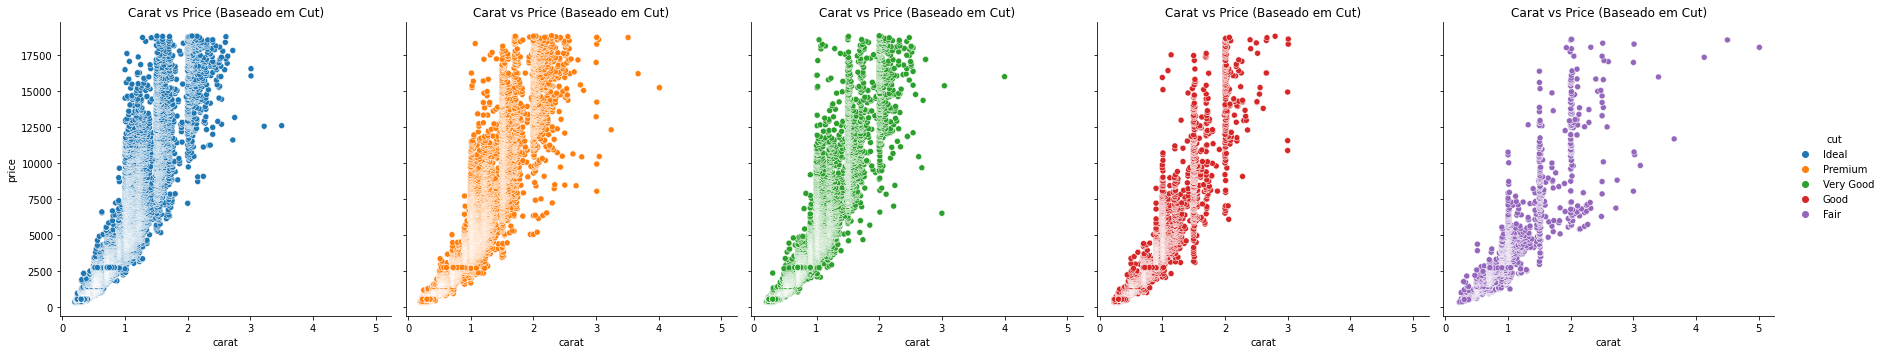

In [50]:
# Rel Plot

rel_plot = sns.relplot(data=data, x="carat", y="price", hue="cut", col='cut')
rel_plot.set(title='Carat vs Price (Baseado em Cut)')

In [42]:
price_by_cut = data[["cut", "price"]].groupby("cut").agg("mean").reset_index().round(2)

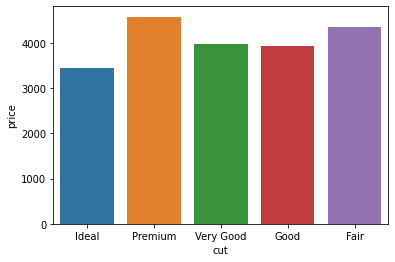

In [43]:
bar_plot = sns.barplot(data=price_by_cut, x="cut", y="price")

In [ ]:
price_by_color = data[["color", "price"]].groupby("color").agg("mean").reset_index().round(2)

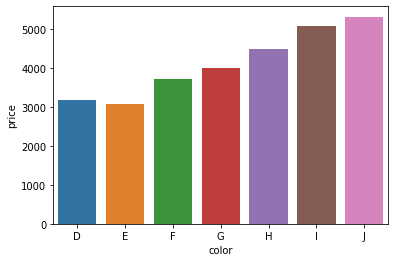

In [45]:
bar_plot = sns.barplot(data=price_by_color, x="color", y="price")

In [33]:
price_by_cut_color = data[["cut", "color", "price"]].groupby(["cut", "color"]).agg("mean").reset_index().round(2)
price_by_cut_color

,cut,color,price
0,Ideal,D,2629.09
1,Ideal,E,2597.55
2,Ideal,F,3374.94
3,Ideal,G,3720.71
4,Ideal,H,3889.33
5,Ideal,I,4451.97
6,Ideal,J,4918.19
7,Premium,D,3631.29
8,Premium,E,3538.91
9,Premium,F,4324.89


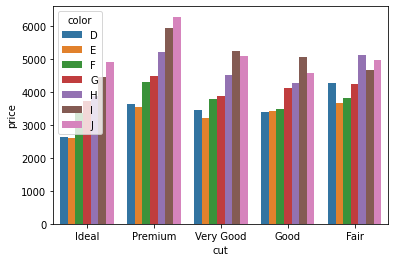

In [34]:
bar_plot = sns.barplot(data=price_by_cut_color, x="cut", y="price", hue="color")

**Insight do gráfico 1**: Escolhi o gráfico de barras para fazer as análises, pois os gráficos de dispersão e relacionamento acabam ficando bastante poluido, mesmo separando por linhas e colunas.

O primeiro insight que a gente pode tirar é que os diamantes de corte 'premium' são os que possuem preço mais elevado, enquanto os de corte 'ideal' são os mais baratos.

Na parte das cores, a cor 'J' é a mais cara enquanto a cor 'E' é a que possui o menor preço médio.

Quando combinamos os gráficos, percebemos que o padrão se mantem nos cortes, onde o 'premium' possui preço medio maior em quase todas as cores, entretanto a cor J é a mais cara somente no 'Ideal' e no 'Premium', enquanto no 'Very Good' e 'Good' a cor mais cara é a 'I' e no 'Fair' a cor mais cara é a 'H'.

Vale ressaltar que a com D é tem seu preço médio mais elevado no corte Fair.

---

## 2\. Número de passageiros em dezembro por ano

In [58]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [69]:
# gráfico do exercício 2

#flights = data.query("month = Oct")
outubro = data.month == "Oct"
flights = data[outubro]

flights = flights.groupby("year").agg("sum").reset_index()
flights

,year,passengers
0,1949,119
1,1950,133
2,1951,162
3,1952,191
4,1953,211
5,1954,229
6,1955,274
7,1956,306
8,1957,347
9,1958,359


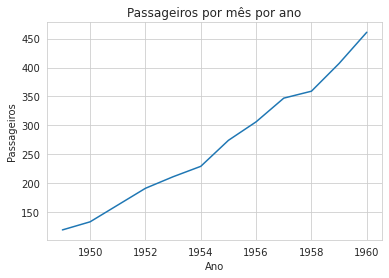

In [72]:
with sns.axes_style('whitegrid'):
 grafico = sns.lineplot(data=flights, x="year", y="passengers")
 grafico.set(title='Passageiros por mês por ano', xlabel='Ano', ylabel='Passageiros')

**Insight do gráfico 2**: O gráfico linear permite fazer uma comparação temporal entre os meses de outubro de diferentes anos.

Conseguimos inferir que, cada ano que passa, o mês de outubro aumenta a movimentação de passageiros, saindo de menos de 150 em 1950 para mais de 450 no ano de 1960.

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [51]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


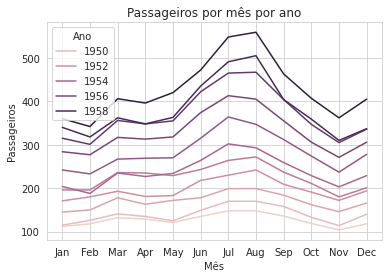

In [57]:
# gráfico do exercício 3

flights = data.query("1949 <= year <= 1959")
with sns.axes_style('whitegrid'):
 grafico = sns.lineplot(data=flights, x="month", y="passengers", hue="year")
 grafico.set(title='Passageiros por mês por ano', xlabel='Mês', ylabel='Passageiros')
 grafico.get_legend().set_title("Ano")

**Insight do gráfico 3**: O gráfico permite que façamos duas inferências: (1) no geral, o número de passageiros sobe a cada ano, quando comparamos mês x mês em cada linha e (2) as sasonalidades se mantém a cada ano, com fevereiro e novembro sendo os meses de menor movimento e julho e agosto os de maior movimento.

---